In [6]:
from pyur5.utils.utils import get_data_jax, normalize, denormalize, make_dataset, create_data#, loss_fn
import jax.numpy as jnp
import pickle

import numpy as np
from mbse.utils.replay_buffer import ReplayBuffer, Transition
from pyur5.models.ens_model import EnsembleModel
import jax
import os

2023-06-06 14:16:47.517989: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
with open("../pyur5/metadata/metadata_new_1.0_False.pkl", "rb") as f:
    metadata = pickle.load(f)

In [8]:

def get_angles(states):
    return np.arctan2(states[:, 1], states[:, 0])
task_typs = ['new', 'pole']

task_typ = 'new'
# data_types = ['train_old', 'valid', 'test']
action_max = 1.0

data = dict()
moving_win = 8
train_horizon = 1 
use_coss = [True, False]
# fpath = "../../data/recording_robot_pole.txt"
if task_typ == 'new':
    fpaths = ["../pyur5/data/recording_robot_new_bottom_step0.017.txt", "../pyur5/data/recording_robot_new_top_step0.017.txt"]
task_typ = 'new'
n_action = 2

In [48]:
fpath = '/home/bizoffermark/workspace/ode/ur5-pendulum/src/demos/ur5CartPole/data/recording_robot.txt'

In [49]:
top = False
use_cos = True
states, x, y, u, ts, states_next = get_data_jax(fpath, top=top, n_action=n_action, moving_win=moving_win, train_horizon=train_horizon
                                                        , use_cos=use_cos)
        

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

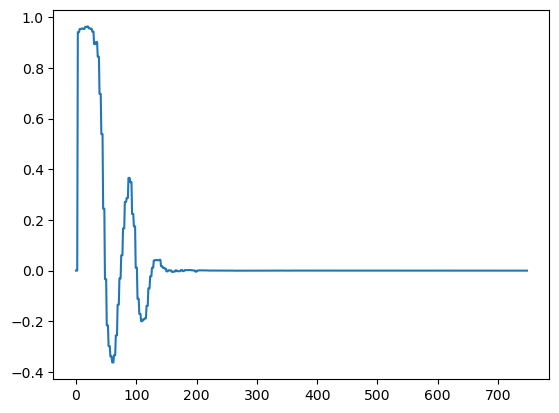

In [50]:
plt.plot(u[:,0])

In [27]:
x = model.obs_space.sample()

In [29]:


xs, us, cost = model.forward_traj(x, 200, 'cem_ilqr')

(7,)
(200, 2)


In [33]:
import math
from gym.envs.classic_control.pendulum import angle_normalize
import matplotlib.pyplot as plt

x_test = xs
u_test = us 

n_model = 10



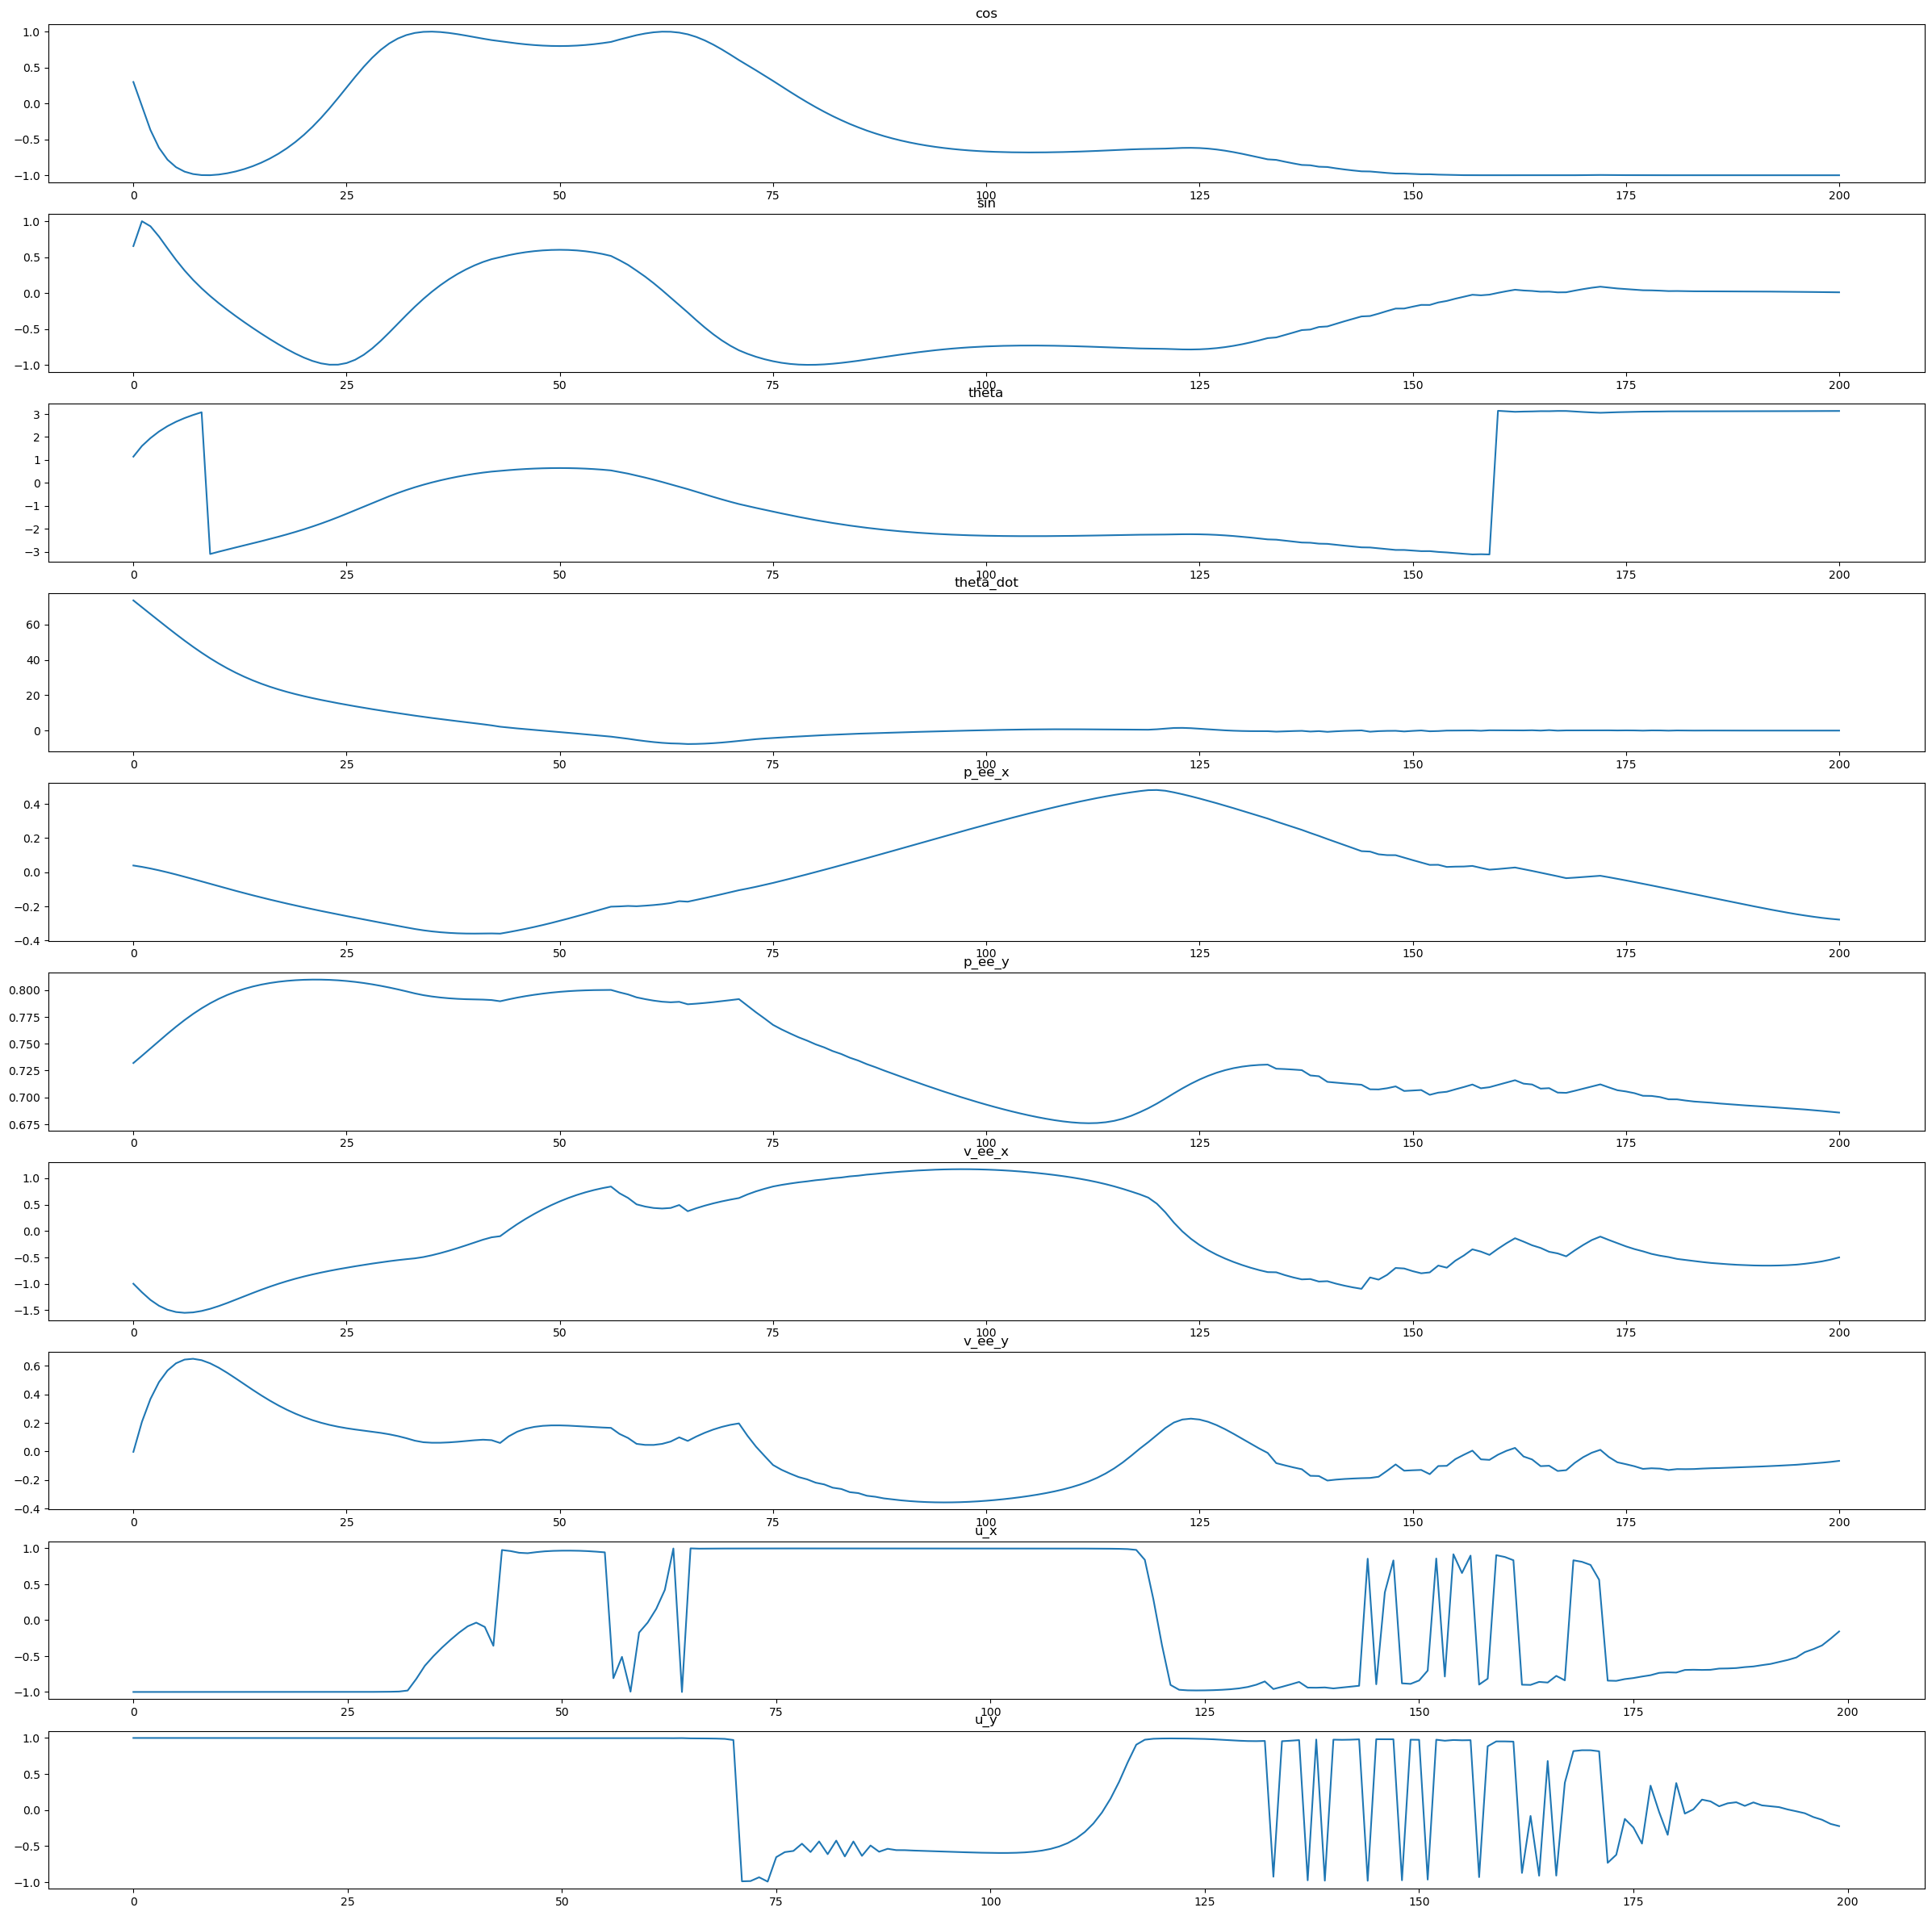

In [38]:
if use_cos:
    cos = [x[0] for x in xs]
    sin = [x[1] for x in xs]
    theta  = [math.atan2(sin[i], cos[i]) for i in range(len(cos))]
    theta_dot = [x[2] for x in xs]
    p_ee_x = [x[3] for x in xs]
    # if n_action > 1:
    p_ee_y = [x[4] for x in xs]
    # if n_action > 2:
    #     p_ee_z = [x[5] for x in obss]  

    v_ee_x = [x[5] for x in xs]
    v_ee_y = [x[6] for x in xs]
    action_x = [a[0] for a in us]
    action_y = [a[1] for a in us]

    datas = [cos, sin, theta, theta_dot, p_ee_x, p_ee_y, v_ee_x, v_ee_y, action_x, action_y]
    headers = ["cos", "sin", "theta", "theta_dot", "p_ee_x", "p_ee_y", "v_ee_x","v_ee_y", "u_x", "u_y"]

else:
    theta = [x[0] for x in xs]
    theta = [angle_normalize(x) for x in theta]
    theta_dot = [x[1] for x in xs]
    p_ee_x = [x[2] for x in xs]
    # if n_action > 1:
    p_ee_y = [x[3] for x in xs]
    # if n_action > 2:
    #     p_ee_z = [x[5] for x in obss]  

    v_ee_x = [x[4] for x in xs]
    v_ee_y = [x[5] for x in xs]

    action_x = [a[0] for a in us]
    action_y = [a[1] for a in us]
    datas = [theta, theta_dot, p_ee_x, p_ee_y, v_ee_x, v_ee_y, action_x, action_y]
    headers = ["theta", "theta_dot", "p_ee_x", "p_ee_y", "v_ee_x", "v_ee_y", 'u_x', 'u_y']

fig, axs = plt.subplots(len(headers), 1, figsize=(30, 30))
#fig.suptitle("{}_{}_{}_{}".format(train_horizon, n_model, n_horizon, solver))
for i in range(len(headers)):
    axs[i].plot(datas[i])
    axs[i].set_title(headers[i])

